# Day 10: Central Limit Theorem
## Author: Hau Nguyen

In [1]:
# Find working directory
import os
path = os.getcwd()
print(path)

C:\Users\HNGUY40\OneDrive - Emory University\Python\Notes


In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [3]:
# Import data
salary_data = pd.read_csv(r'C:\Users\HNGUY40\OneDrive - Emory University\Python\Data\SF_Salary.csv')
# First few rows
salary_data.head()

,...1,salary2019
0,1,577632.60
1,2,483072.20
2,3,482649.40
3,4,451507.11
4,5,449378.37


## Sampling Distribution of Sample Mean

### With data on salary

In [4]:
# Filter dataframe to use only variable "salary2019" as a series
salary = salary_data['salary2019']
# Convert 'salary' from a series to an array to work with Numpy
salary = np.array(salary)

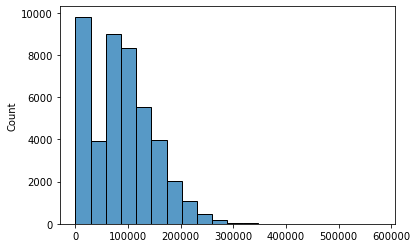

In [5]:
# Practice:
# Plot the distribution of salary
# Add bins=20 so it is easier to vizualize the type of the distribution
hist_sal = sns.histplot(salary, bins=20);

In [6]:
# Think about "salary" as population, and simulate sampling distribution of sample mean of salary
# Simulation:
# Choose a sample of size 2, then 10, then 30 from "salary" -> find its mean. Do this 10000 times. 
# 10000 times is not all the possible samples, but getting "closer" to all possible samples
# Number of iteration
iters=10000
# Empty vector to store simulated sample means
sampling_mean=[]
# Loop to generate simulated sample means
for i in range(0,iters): # or range(iters) or range(1,iters+1)
    random_sample = np.random.choice(salary, 2)
    sample_mean = np.mean(random_sample)
    sampling_mean.append(sample_mean)

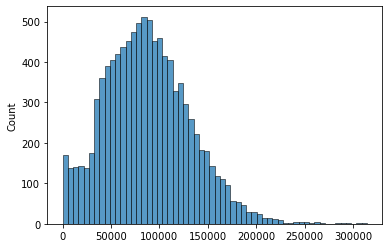

In [7]:
# Practice:
# Plot distribution of sampling mean
hist_sal_mean = sns.histplot(sampling_mean);

### Central Limit Theorem:
- It does not matter what the underlying distribution of salary is, as long as the sample size>=30, you can use the Normal distribution to estimate something about the mean.

### With uniform data

In [8]:
# Practice:
# Simulate Uniform(0, 5) distribution with 100,000 observations -> population
data_unif = stats.uniform.rvs(size=100000, loc=0, scale=5)

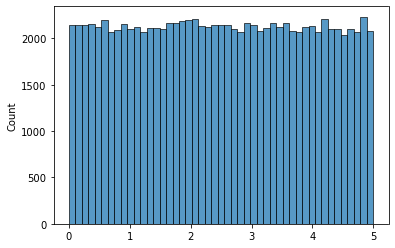

In [9]:
# Pratice:
# Plot uniform distribution
hist_unif = sns.histplot(data_unif);

In [10]:
# Practice:
# Simulation: 10000 sample means of uniform distribution
# Number of iteration
iters=10000
# Empty vector to store simulated sample means
sampling_mean=[]
# Loop to generate simulated sample means: increase sample size from 2 to 10, 30
for i in range(0,iters):
    random_sample = np.random.choice(data_unif, 2)
    sample_mean = np.mean(random_sample)
    sampling_mean.append(sample_mean)

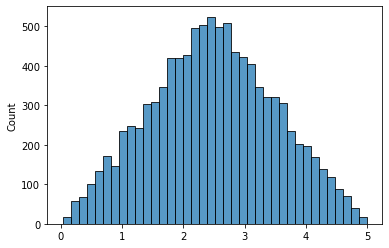

In [11]:
# Practice:
# Plot distribution of sampling mean
hist_unif_mean = sns.histplot(sampling_mean);

## Sampling Distribution of Sample Proportion
- Proportion $Y=\frac{X}{n}$, so $X \sim Binom(n,p)$. ($X$ is the number of successes, and $Y$ is the proportion of successes)
- We claim that proportion $Y \sim Norm(p, \sqrt{\frac{p(1-p)}{n}})$ by CLT.
- If this is true, we can rely on the Normal distribution to work with proportion .

In [12]:
# Start with number of successes X: x=3, n=100 then increase
# Current unemployment rate: 3.8%
# Find probability that in a sample of 100 people, 3 or fewer are unemployed
stats.binom.cdf(3,100,.038)

0.4703111414330726

In [13]:
# Simulation for proportion of successes Y:
# Number of iterations
iters=1000
# Empty vector to store simulated proportions
unemp=[]
# Loop to generate proportions of unemployed people in each sample
# Although we are not choosing samples from given population, we can assume
# that we are choosing samples from US population because we have same p=0.038
for i in range(0,iters):
    random_sample = stats.binom.rvs(n=100, p=0.038) # Generate number of unemployed people
    proportion = random_sample/100
    unemp.append(proportion)

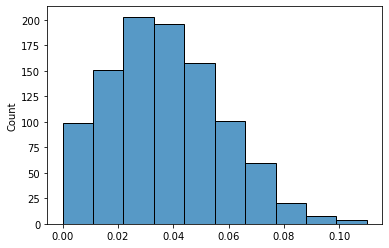

In [14]:
# Practice: 
# Plot sampling proportion of proportion
# Note: there are gaps because of missing values in certain ranges
# Add bins=10 to create more continuous groups
hist_proportion = sns.histplot(unemp, bins=10);

In [15]:
# Test for gaps in histogram due to missing values in certain ranges
# pd.Series(unemp).value_counts(bins=20).sort_index()

In [16]:
# Mean and standard deviation
mean_unemp = np.mean(unemp)
std_unemp = np.std(unemp)

In [17]:
# Compare probabilities between proportion of successes Y (Normal) and number of successes X (Binom):
stats.norm.cdf(0.03, loc = mean_unemp, scale = std_unemp)

0.3235407720923388

In [18]:
# Issues: np = 100*0.038 = 3.8 < 10 -> Sample is not large enough to apply CLT
# If increase n = 1000: np = 38 > 10 -> Apply CLT.
# Update x=3 to x=30 to maintain proportion of interest

In [19]:
!jupyter nbconvert --to html Day_10_Notes.ipynb

[NbConvertApp] Converting notebook Day_10_Notes.ipynb to html
[NbConvertApp] Writing 599206 bytes to Day_10_Notes.html
